In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Task 1.1
boston = fetch_openml(name="boston", version=1, as_frame=True) 
df = boston.frame 
df = df.astype(float) 

X = df.drop('MEDV', axis=1) 
y = df['MEDV'] 

print(df.head()) 
print(df.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    

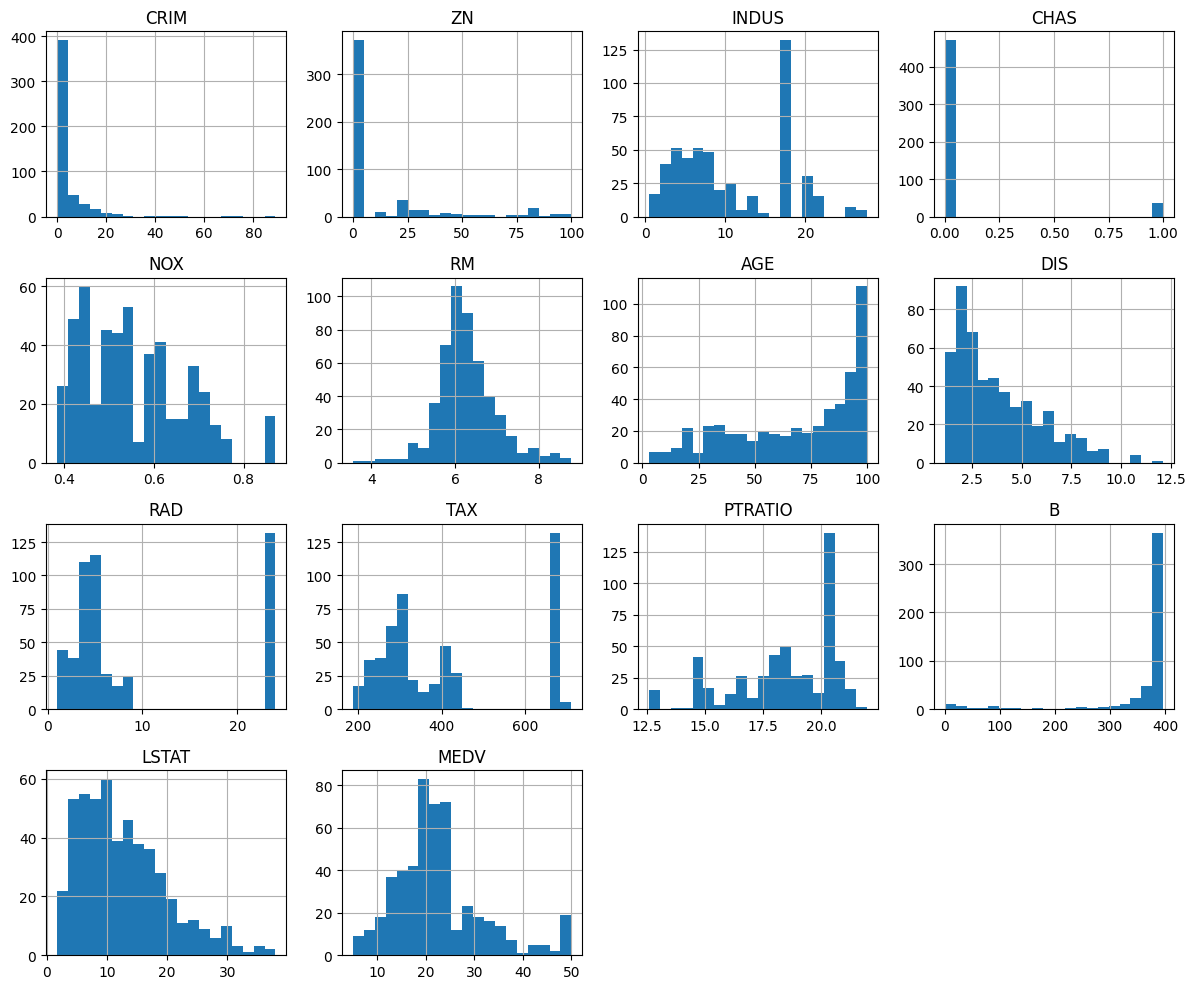

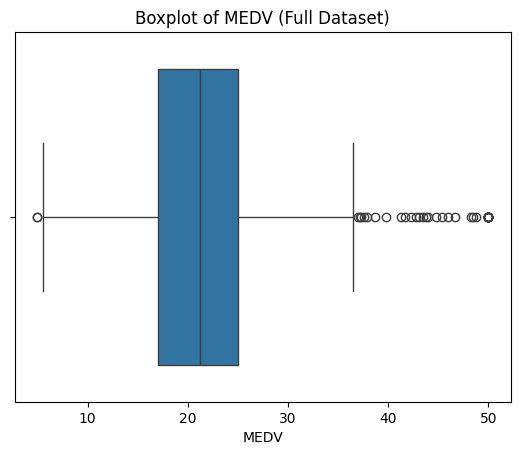

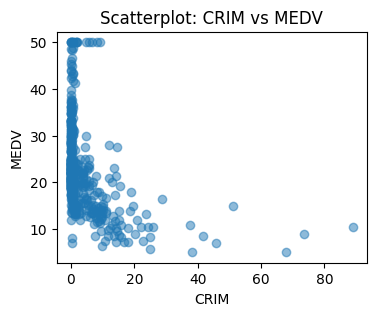

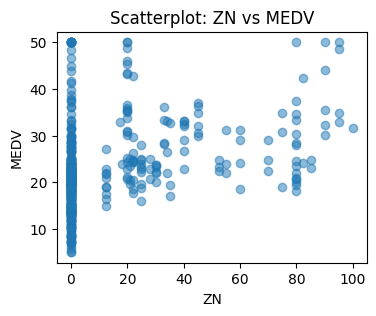

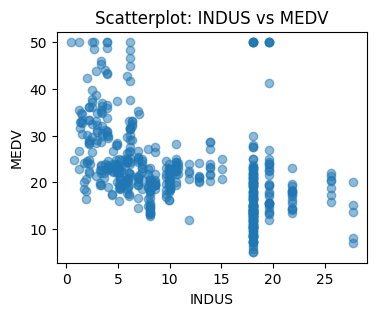

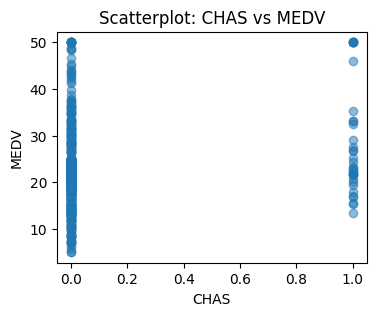

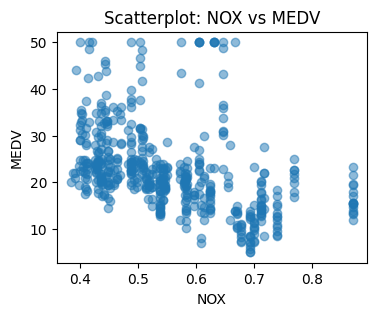

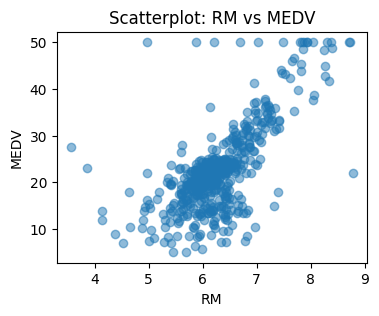

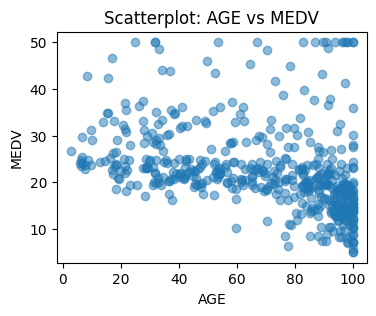

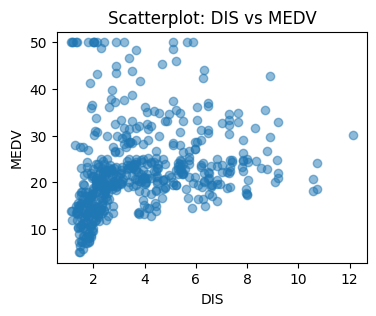

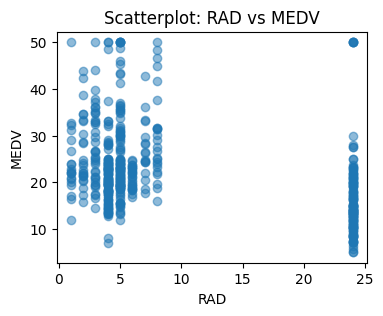

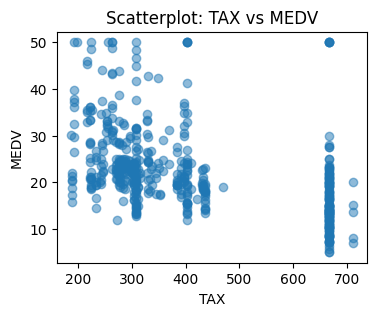

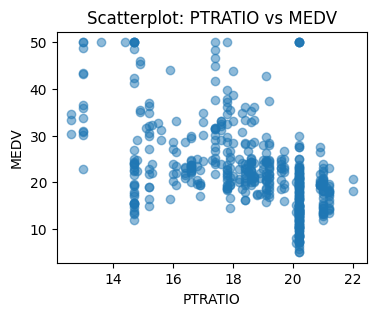

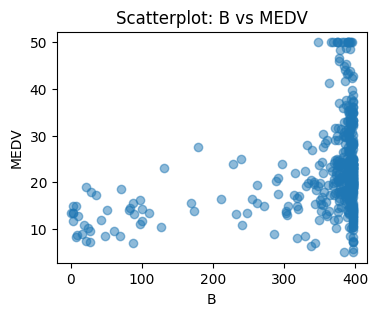

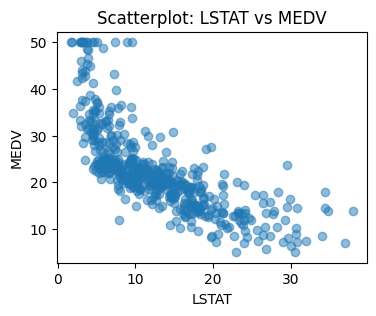

In [3]:
#Task 1.2 & 1.3
df.hist(figsize=(12, 10), bins=20) 
plt.tight_layout()
plt.show()

sns.boxplot(x=df['MEDV']) 
plt.title('Boxplot of MEDV (Full Dataset)')
plt.show()

for col in X.columns:
    plt.figure(figsize=(4, 3))
    plt.scatter(df[col], df['MEDV'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.title(f'Scatterplot: {col} vs MEDV')
    plt.show()

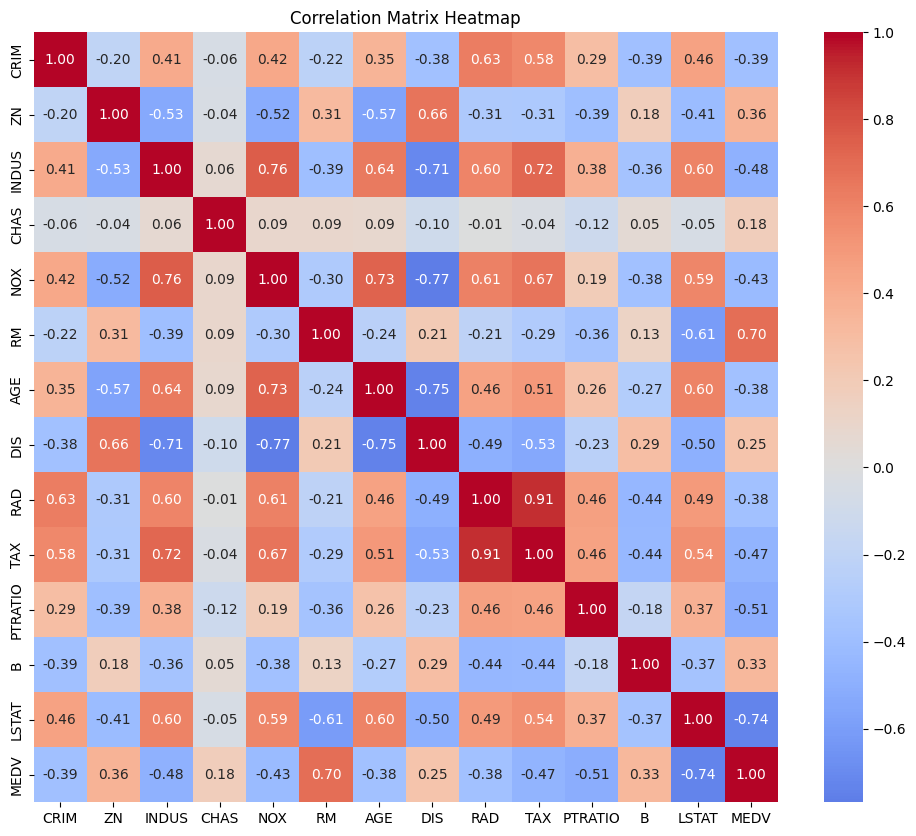

In [4]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [6]:
# Task 3.1
X_const = sm.add_constant(X).astype(float) 
model_full = sm.OLS(y, X_const).fit() 
print(model_full.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 05 Feb 2026   Prob (F-statistic):          6.72e-135
Time:                        07:01:50   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [8]:
# Task 3.2
y_pred = model_full.predict(X_const)
print(f"R-squared: {r2_score(y, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.4f}")

R-squared: 0.7406
RMSE: 4.6792


In [9]:
# Task 4.1:
fitted_vals = model_full.fittedvalues 
residuals = model_full.resid

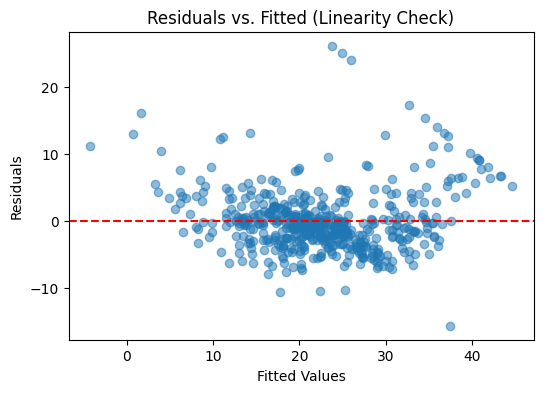

In [10]:
# 1. Linearity: Residuals vs. Fitted plot
plt.figure(figsize=(6,4))
plt.scatter(fitted_vals, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted (Linearity Check)') 
plt.show()

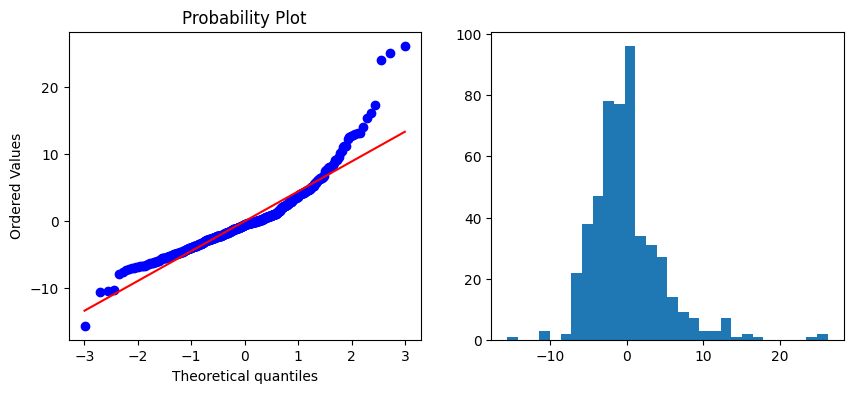

Shapiro-Wilk Test p-value: 1.480407928922019e-17


In [11]:
# 2. Normality: Q-Q Plot and Histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
stats.probplot(residuals, dist="norm", plot=ax1) 
ax2.hist(residuals, bins=30) 
plt.show()
print(f"Shapiro-Wilk Test p-value: {stats.shapiro(residuals).pvalue}") 

In [12]:
# 3. Homoscedasticity: Breusch-Pagan test
bp_test = het_breuschpagan(residuals, model_full.model.exog)
print(f"Breusch-Pagan p-value: {bp_test[1]}") 

Breusch-Pagan p-value: 6.265430719873663e-09


In [13]:
#Task 5.1: Calculate VIF
X_vif = sm.add_constant(X).astype(float)
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_data = vif_data[vif_data['feature'] != 'const']
print(vif_data)

    feature       VIF
1      CRIM  1.792192
2        ZN  2.298758
3     INDUS  3.991596
4      CHAS  1.073995
5       NOX  4.393720
6        RM  1.933744
7       AGE  3.100826
8       DIS  3.955945
9       RAD  7.484496
10      TAX  9.008554
11  PTRATIO  1.799084
12        B  1.348521
13    LSTAT  2.941491


wait di pa ako sure double check ko final answer sa iba bukas